### Prepare data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('../input/steam-reviews/dataset.csv')
data.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


Slice only app_name and review_score since we don't use other columns in this notebook

In [3]:
data=data.loc[:,['app_name','review_score']]
data.head()

,app_name,review_score
0,Counter-Strike,1
1,Counter-Strike,1
2,Counter-Strike,1
3,Counter-Strike,1
4,Counter-Strike,1


### Finding popular game

Suppose we define a popular game is a game that have a lot of review, so we can find a number of review per game as below

In [4]:
review_count=data.groupby('app_name').count()
review_count

,review_score
app_name,
神明的一天世界-God's One Day World,14
! That Bastard Is Trying To Steal Our Gold !,26
"!""We Are The Dwarves""!",103
"""Glow Ball"" - The billiard puzzle game",27
#SelfieTennis,63
...,...
ルナティックドーン レジェンドパック,2
ルナティックドーン 前途への道標,1
丛林守望者（Ranger of the jungle）,5


Top 10 popular game

In [5]:
top10_game=review_count.sort_values('review_score',ascending=False)[:10]
top10_game

,review_score
app_name,
PAYDAY 2,88973
DayZ,88850
Terraria,84828
Rust,77037
Dota 2,73541
Rocket League,54227
Undertale,51918
Left 4 Dead 2,50980
Warframe,48229


### Visualize popular game review

Prepare data for plot

In [6]:
popular_game_index=top10_game.index
popular_game_index

Index(['PAYDAY 2', 'DayZ', 'Terraria', 'Rust', 'Dota 2', 'Rocket League',
       'Undertale', 'Left 4 Dead 2', 'Warframe', 'Grand Theft Auto V'],
      dtype='object', name='app_name')

In [7]:
popular_game=data.loc[data.app_name.isin(popular_game_index)]
popular_game

,app_name,review_score
68092,Terraria,1
68093,Terraria,1
68094,Terraria,1
68095,Terraria,1
68096,Terraria,1
...,...,...
6092427,Dota 2,-1
6092428,Dota 2,1
6092429,Dota 2,1
6092430,Dota 2,1


Plot comparing bar chart

<AxesSubplot:xlabel='app_name', ylabel='count'>

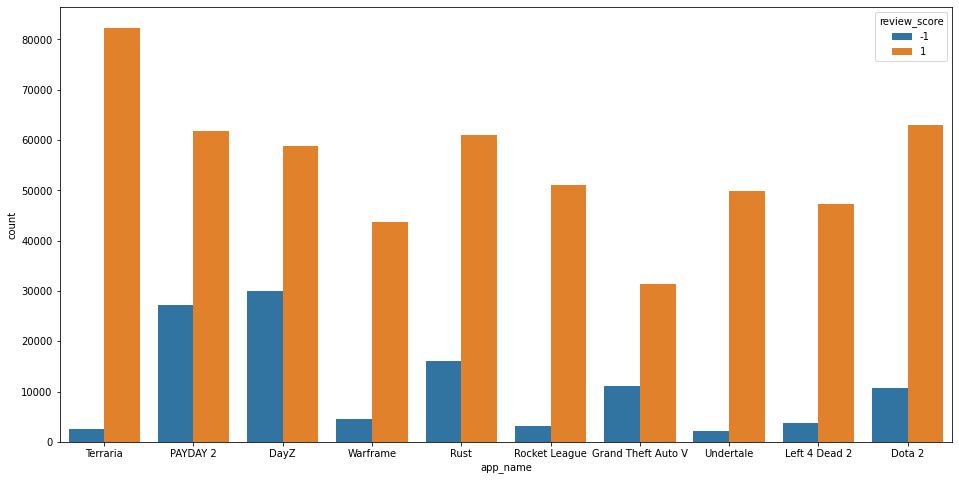

In [8]:
plt.figure(figsize=(16,8))
sns.countplot(x='app_name',hue="review_score",data=popular_game)

From bar chart, we can see that terraria have most positive review while DayZ have most negative review

We also want to know postive and negative review percentage for easier compare game

In [9]:
#Store count of positive and negative review of popular game as dataframe
all_game_review_count_df=pd.DataFrame()
for game in popular_game_index:
    that_game_df=data[data.app_name==game]
    that_game_count=that_game_df.value_counts()
    all_game_review_count_df=pd.concat([all_game_review_count_df,that_game_count.unstack()])
all_game_review_count_df

review_score,-1,1
app_name,,
PAYDAY 2,27208,61765
DayZ,30003,58847
Terraria,2478,82350
Rust,16005,61032
Dota 2,10618,62923
Rocket League,3107,51120
Undertale,2067,49851
Left 4 Dead 2,3797,47183
Warframe,4480,43749


Calculate percentage

In [10]:
all_game_review_count_df['-1(%)']=((all_game_review_count_df[-1]/(all_game_review_count_df[-1]+all_game_review_count_df[1]))*100).round(2)
all_game_review_count_df['1(%)']=((all_game_review_count_df[1]/(all_game_review_count_df[-1]+all_game_review_count_df[1]))*100).round(2)
all_game_review_count_df=all_game_review_count_df.drop([-1,1],axis=1)
all_game_review_count_df

review_score,-1(%),1(%)
app_name,,
PAYDAY 2,30.58,69.42
DayZ,33.77,66.23
Terraria,2.92,97.08
Rust,20.78,79.22
Dota 2,14.44,85.56
Rocket League,5.73,94.27
Undertale,3.98,96.02
Left 4 Dead 2,7.45,92.55
Warframe,9.29,90.71


<AxesSubplot:xlabel='app_name', ylabel='Percentage'>

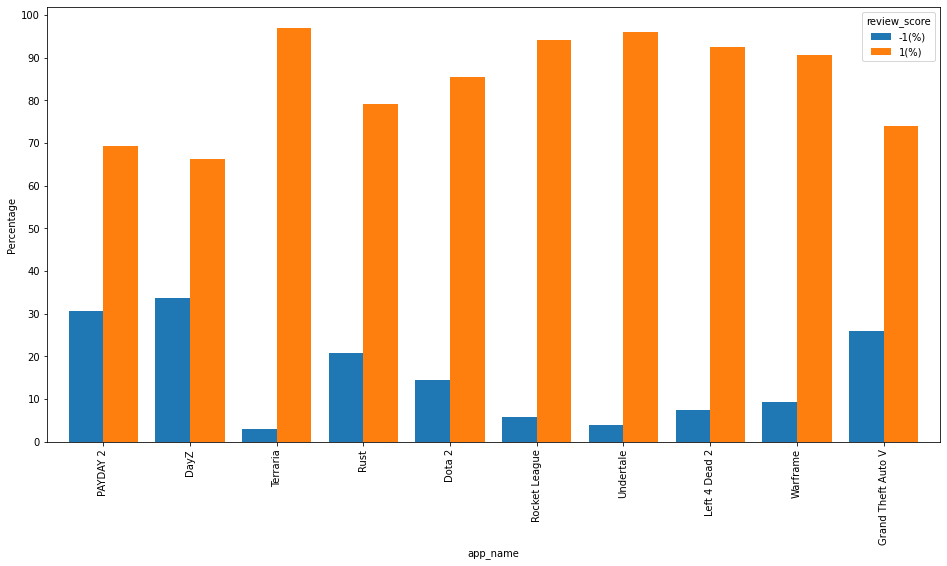

In [11]:
all_game_review_count_df.plot(kind='bar',figsize=(16,8),ylabel='Percentage',yticks=[10*i for i in range(11)],width=0.8)

From bar chart we observe that Terraria, Rocket League, Undertale, Left 4 Dead 2 and Warframe have positive percentage above 90%

While Payday2 and DayZ have low positive review percentage at around approximately 69% and 67%